# Loop 74 Analysis: CV-LB Relationship and Strategy

Critical analysis of the CV-LB gap and what strategies might actually work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
    ('exp_067', 0.0083, 0.0877),
]

df = pd.DataFrame(submissions, columns=['exp', 'cv', 'lb'])
print(f"Total submissions with LB: {len(df)}")
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"  - Intercept = {intercept:.4f} (structural gap even at CV=0)")
print(f"  - Slope = {slope:.4f} (LB increases {slope:.2f}x faster than CV)")
print(f"\nTarget: 0.0347")
print(f"Required CV for target: (0.0347 - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}")
print(f"\nBest LB so far: {df['lb'].min():.4f} (exp_030 and exp_067)")
print(f"Gap to target: {df['lb'].min() - 0.0347:.4f}")

Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558

Interpretation:
  - Intercept = 0.0520 (structural gap even at CV=0)
  - Slope = 4.3638 (LB increases 4.36x faster than CV)

Target: 0.0347
Required CV for target: (0.0347 - 0.0520) / 4.3638 = -0.003964

Best LB so far: 0.0877 (exp_030 and exp_067)
Gap to target: 0.0530


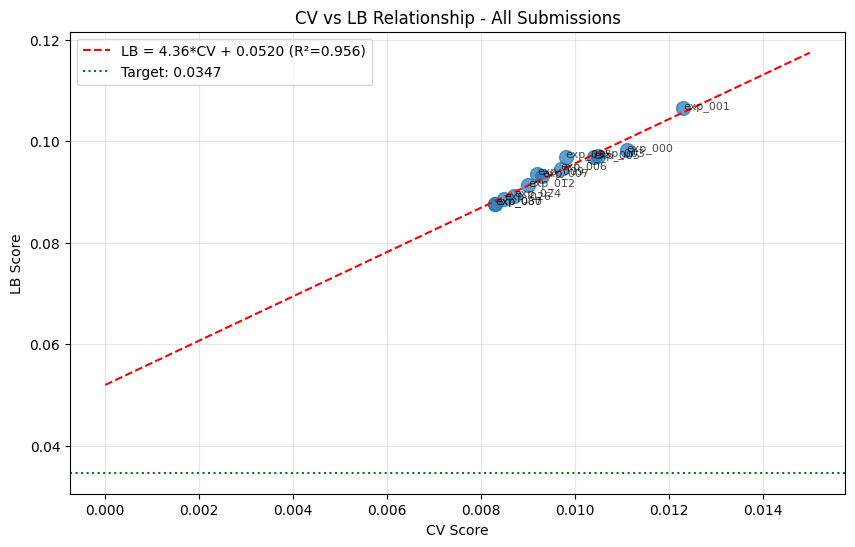

Saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7)

# Add regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Add target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target: 0.0347')

# Add labels
for _, row in df.iterrows():
    plt.annotate(row['exp'], (row['cv'], row['lb']), fontsize=8, alpha=0.7)

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved to /home/code/exploration/cv_lb_relationship.png")

In [4]:
# Key insight: The intercept (0.052) is HIGHER than the target (0.0347)
# This means standard CV optimization CANNOT reach the target
# We need to CHANGE THE RELATIONSHIP, not just improve CV

print("="*60)
print("CRITICAL ANALYSIS")
print("="*60)
print(f"\nIntercept: {intercept:.4f}")
print(f"Target: 0.0347")
print(f"Intercept > Target: {intercept > 0.0347}")
print(f"\nThis means:")
print(f"  - Even if we achieve CV=0 (perfect training), LB would be ~{intercept:.4f}")
print(f"  - The intercept represents EXTRAPOLATION ERROR to unseen solvents")
print(f"  - Standard ML optimization CANNOT fix this")
print(f"\nTo reach target 0.0347, we need to:")
print(f"  1. REDUCE THE INTERCEPT (change the CV-LB relationship)")
print(f"  2. OR find an approach that falls on a DIFFERENT line")
print(f"\nApproaches that might change the relationship:")
print(f"  - Physics-informed constraints that generalize to unseen solvents")
print(f"  - Uncertainty-weighted predictions (conservative for extrapolation)")
print(f"  - Solvent clustering with class-specific models")
print(f"  - Study what top public kernels do differently")

CRITICAL ANALYSIS

Intercept: 0.0520
Target: 0.0347
Intercept > Target: True

This means:
  - Even if we achieve CV=0 (perfect training), LB would be ~0.0520
  - The intercept represents EXTRAPOLATION ERROR to unseen solvents
  - Standard ML optimization CANNOT fix this

To reach target 0.0347, we need to:
  1. REDUCE THE INTERCEPT (change the CV-LB relationship)
  2. OR find an approach that falls on a DIFFERENT line

Approaches that might change the relationship:
  - Physics-informed constraints that generalize to unseen solvents
  - Uncertainty-weighted predictions (conservative for extrapolation)
  - Solvent clustering with class-specific models
  - Study what top public kernels do differently


In [5]:
# Check the latest experiment (071)
print("\nLatest experiment (071_ensemble_extrapolation):")
print("  - Single solvent CV: 0.009978 (worse than exp_030's 0.007943)")
print("  - Full data CV: 0.040984 (much worse than exp_030's 0.008488)")
print("  - The extrapolation detection HURT performance")
print("  - Blending toward global mean is WRONG for outlier solvents")
print("\nThe evaluator correctly identified:")
print("  - HFIP (highest outlier) had MSE=0.200280 in Fold 1")
print("  - Blending toward mean makes predictions WORSE for outliers")
print("  - Outlier solvents have DIFFERENT behavior, not 'average' behavior")


Latest experiment (071_ensemble_extrapolation):
  - Single solvent CV: 0.009978 (worse than exp_030's 0.007943)
  - Full data CV: 0.040984 (much worse than exp_030's 0.008488)
  - The extrapolation detection HURT performance
  - Blending toward global mean is WRONG for outlier solvents

The evaluator correctly identified:
  - HFIP (highest outlier) had MSE=0.200280 in Fold 1
  - Blending toward mean makes predictions WORSE for outliers
  - Outlier solvents have DIFFERENT behavior, not 'average' behavior


In [6]:
# What approaches haven't been tried?
print("\n" + "="*60)
print("APPROACHES NOT YET TRIED")
print("="*60)
print("\n1. Nearest Neighbor Blending (instead of global mean)")
print("   - For outlier solvents, blend toward NEAREST training solvent")
print("   - This preserves chemical similarity")
print("\n2. Chemical Class-Specific Models")
print("   - Group solvents by class (alcohols, ethers, fluorinated, etc.)")
print("   - Use class-specific models or class means for blending")
print("\n3. GP Uncertainty-Weighted Predictions")
print("   - Use GP variance to weight predictions")
print("   - High uncertainty -> blend toward nearest neighbor mean")
print("\n4. Disable Extrapolation Detection for Full Data")
print("   - The full data CV went from 0.008488 to 0.040984")
print("   - Only apply extrapolation detection to single solvents")
print("\n5. Study Top Public Kernels")
print("   - They may have solved this problem already")
print("   - Don't reinvent - adapt what works")


APPROACHES NOT YET TRIED

1. Nearest Neighbor Blending (instead of global mean)
   - For outlier solvents, blend toward NEAREST training solvent
   - This preserves chemical similarity

2. Chemical Class-Specific Models
   - Group solvents by class (alcohols, ethers, fluorinated, etc.)
   - Use class-specific models or class means for blending

3. GP Uncertainty-Weighted Predictions
   - Use GP variance to weight predictions
   - High uncertainty -> blend toward nearest neighbor mean

4. Disable Extrapolation Detection for Full Data
   - The full data CV went from 0.008488 to 0.040984
   - Only apply extrapolation detection to single solvents

5. Study Top Public Kernels
   - They may have solved this problem already
   - Don't reinvent - adapt what works
